# HR Analytics Project- Understanding the Attrition in HR

Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

 # IMPORTING NECESSARY LIBRARIES

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

 # LOADING DATASET

In [7]:
df=pd.read_csv('ibm_hr_attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Top 5 heads of the data frame.

In [8]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


Bottom 5 of the data frame.

In [9]:
df.shape

(1470, 35)

We have 1470 and 35 rows in the data frame.

 # CHECKING NULL VALUES IN THE DATAFRAME

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

we have no null values in the data frame.

<AxesSubplot:>

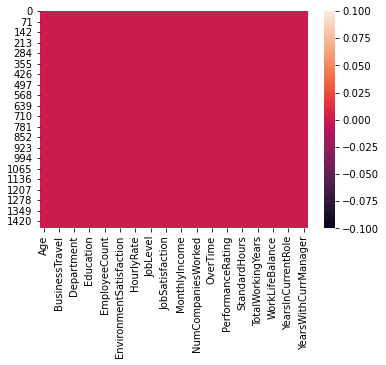

In [11]:
# checking null values through heatmap
sns.heatmap(df.isnull())

Heatmap is showing , no null values.

In [12]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

  # CHECKING DATATYPES OF THE COLUMNS

In [13]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We have 26 integer data type columns and 9 object data types columns in the data frame.

 # CHECKING UNIQUE VALUES IN THE COLUMNS AND VISUALIZATION OF NOMINAL DATA

No     1233
Yes     237
Name: Attrition, dtype: int64


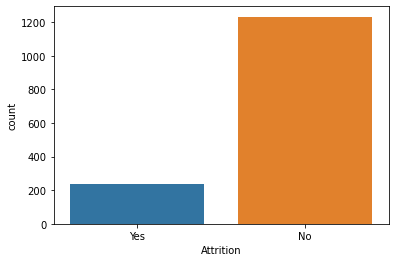

In [17]:
ax=sns.countplot(x='Attrition',data=df)
print(df['Attrition'].value_counts())

Attrition is our target column with two unique values yes and no.

Total number of count in yes is 237 snf total number of count for no is 1233, indicating imbalanced data.

Male      882
Female    588
Name: Gender, dtype: int64


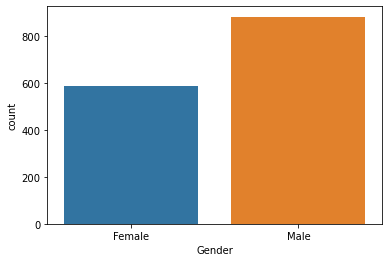

In [47]:
ax=sns.countplot(x='Gender',data=df)
print(df['Gender'].value_counts())

Number of count is maximum for male that is 882.

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


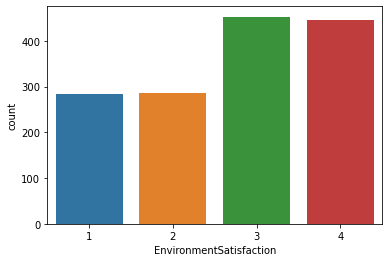

In [48]:
ax=sns.countplot(x='EnvironmentSatisfaction',data=df)
print(df['EnvironmentSatisfaction'].value_counts())

Four unique values in EnvironmentSatisfaction column 1, 2, 3 and 4 , total number of count in 3 is 453 that is maximum and the total number of count in 4 is 446 , 3 and 4 is looking approximately same.

In 1 and 2 there  is not much difference.

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


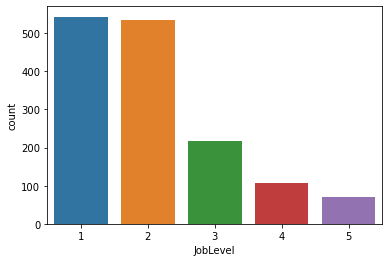

In [49]:
ax=sns.countplot(x='JobLevel',data=df)
print(df['JobLevel'].value_counts())

There is 5 unique values with maximum number of count on blue(1) colored bar that is 543 and yellow(2) colored bar is with 534 number of conts there is not much difference between them.

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


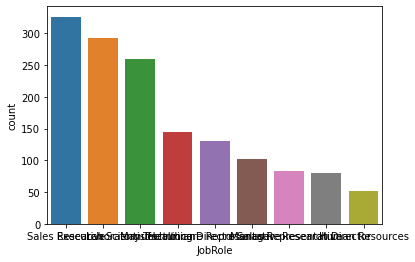

In [55]:
ax=sns.countplot(x='JobRole',data=df)

print(df['JobRole'].value_counts())

In sales Executive JOBROLE there is maximum number of persons that is 326 and in Human Resources JobROLE there is minimum number of employees. 

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


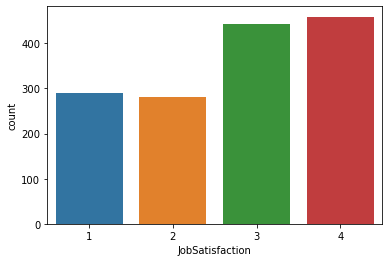

In [57]:
ax=sns.countplot(x='JobSatisfaction',data=df)
print(df['JobSatisfaction'].value_counts())

four unique values in JobSatisfaction column 1, 2, 3 and 4 and maximun number of count is on 4 that is in red color with 459 employees.
there is not much difference between 3 and 4, and there is also not much difference between 1 and 2.

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


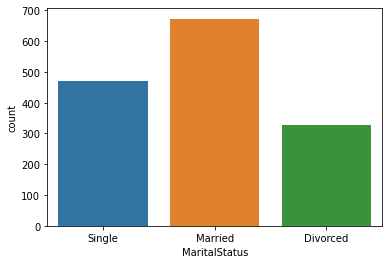

In [58]:
ax=sns.countplot(x='MaritalStatus',data=df)
print(df['MaritalStatus'].value_counts())

 673 employees are married , 470 employees are single and 327 employees are divorced.

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64


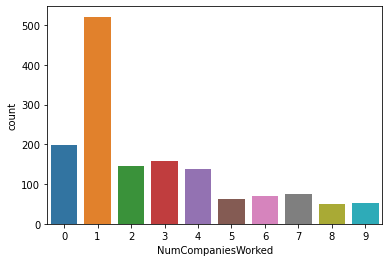

In [59]:
ax=sns.countplot(x='NumCompaniesWorked',data=df)
print(df['NumCompaniesWorked'].value_counts())

521 employees worked in a single company showing maximum number of counts.

No     1054
Yes     416
Name: OverTime, dtype: int64


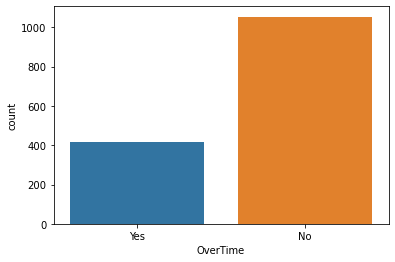

In [61]:
ax=sns.countplot(x='OverTime',data=df)
print(df['OverTime'].value_counts())

1054 employees are not doing overtime and 416 employees are doing overtime.

3    1244
4     226
Name: PerformanceRating, dtype: int64


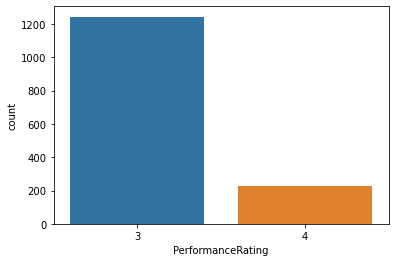

In [62]:
ax=sns.countplot(x='PerformanceRating',data=df)
print(df['PerformanceRating'].value_counts())

1244 employees have 3 rating and 226 employees ahve 4 rating.

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


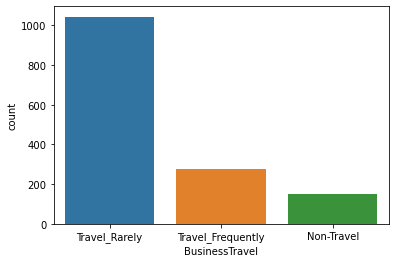

In [19]:
ax=sns.countplot(x='BusinessTravel',data=df)
print(df['BusinessTravel'].value_counts())

There is 3 unique values in the 'Business Travel' column , people who travel_rarely showing maximum number of counts 1043 in Blue color.

In between Travel_Frequently and Non-Travel  there is not much noticabel difference.


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


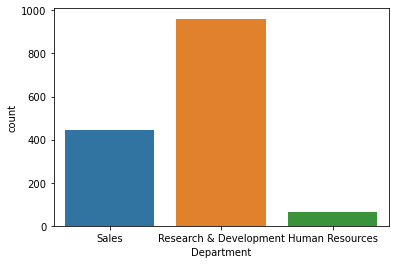

In [20]:
ax=sns.countplot(x='Department',data=df)
print(df['Department'].value_counts())

Research & Development is showing maximum number of count with 961 in yellow color.

Sales is in blue color with 446 number of counts and Human Resources is minimum counts with 63.

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
17     20
12     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64


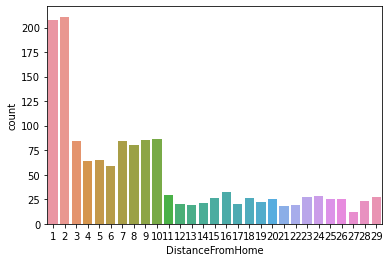

In [21]:
ax=sns.countplot(x='DistanceFromHome',data=df)
print(df['DistanceFromHome'].value_counts())

DistanceFromHome ranges in between 1 km to 29 km and 1km and 2km is showing maximum number of counts with approx 200.

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


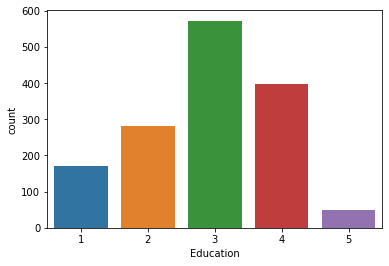

In [22]:
ax=sns.countplot(x='Education',data=df)
print(df['Education'].value_counts())

In Education column , there is 5 unique values , green color is  indiacting maximum values 572.

Purple color is with minimum counts with 48.

and in other unique number there is not much difference.

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


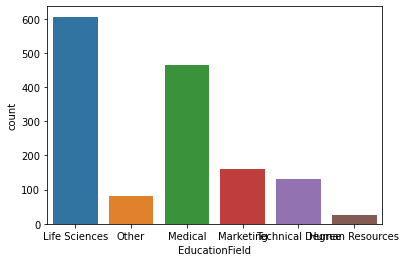

In [24]:
ax=sns.countplot(x='EducationField',data=df)
print(df['EducationField'].value_counts())

Life Sciences is with maximum number of counts 606 in blue color.

Human Resources with minimum number of counts 27 in brown color.

the value count of medical is 464, the value count of Marketing is 159 ,the value count of technical degree is 132 and for other is 82.

1    1470
Name: EmployeeCount, dtype: int64


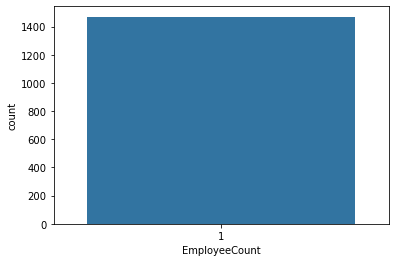

In [25]:
ax=sns.countplot(x='EmployeeCount',data=df)
print(df['EmployeeCount'].value_counts())

one unique values with 1470 number of counts.

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64


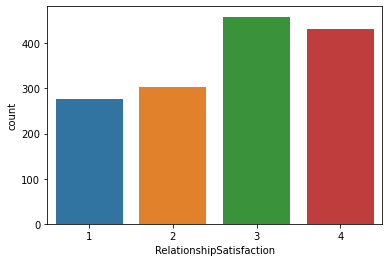

In [27]:
ax=sns.countplot(x='RelationshipSatisfaction',data=df)
print(df['RelationshipSatisfaction'].value_counts())

The total number of count in two bars green(3) and red(4) is 459 and 432 respectively and green colored bar is with maximum number of counts.

The total number of count in other two bars blue(1) and yellow(4) is with 276 and 303 respectively with not much noticable difference.

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64


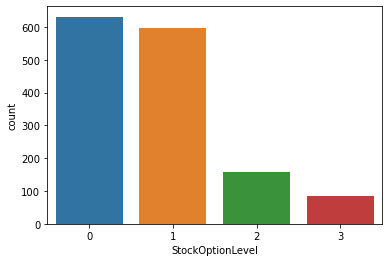

In [28]:
ax=sns.countplot(x='StockOptionLevel',data=df)
print(df['StockOptionLevel'].value_counts())

There are 4 unique values in StockOptionLevel column 0, 1, 2 and 3 and 0 is with maximum number of count in blue color.

The total number of count in 1 is 596 in yellow color, there is not much diffrence between 0 and 1.

In unique value 2 and 3 there is  also not much difference and 3 is with minimum number of values.

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64


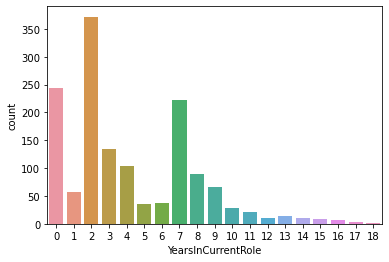

In [30]:
ax=sns.countplot(x='YearsInCurrentRole',data=df)
print(df['YearsInCurrentRole'].value_counts())

YearsInCurrentRole ranges between 0 to 18 , and 2 YearsInCurrentRole is with maximum number of counts that is 372.

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64


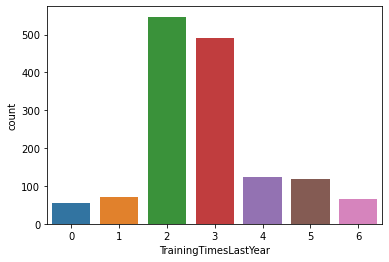

In [31]:
ax=sns.countplot(x='TrainingTimesLastYear',data=df)
print(df['TrainingTimesLastYear'].value_counts())

TrainingTimesLastYear is indicating maximum number of counts on 2(TrainingTimesLastYear) that is 547, and 3 with 491 number of counts.
and all the bars is looking approximately same.

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


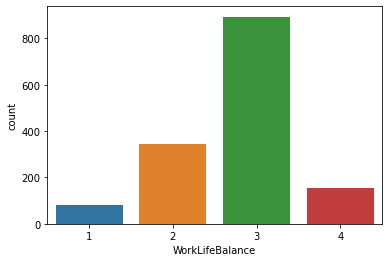

In [32]:
ax=sns.countplot(x='WorkLifeBalance',data=df)
print(df['WorkLifeBalance'].value_counts())

There is 4 unique values in WorkLifeBalance column that is 1, 2, 3 and 4. 
and on 3 there is maximum number of counts that is 893.

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
12     10
13     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64


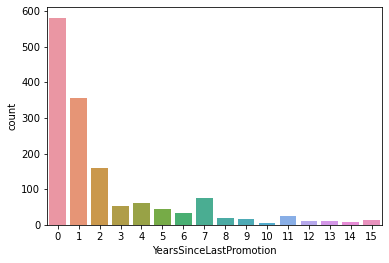

In [34]:
ax=sns.countplot(x='YearsSinceLastPromotion',data=df)
print(df['YearsSinceLastPromotion'].value_counts())

There is 581 employees with 0 YearsSinceLastPromotion with maximum values.

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: YearsWithCurrManager, dtype: int64


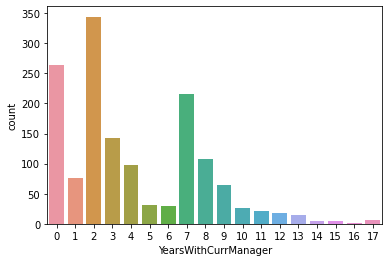

In [35]:
ax=sns.countplot(x='YearsWithCurrManager',data=df)
print(df['YearsWithCurrManager'].value_counts())

344 employees with 2 YearsWithCurrManager is maximum that is 344.

 # CHECKING THE DISTRIBUTION 

In [38]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

<AxesSubplot:xlabel='Age', ylabel='Density'>

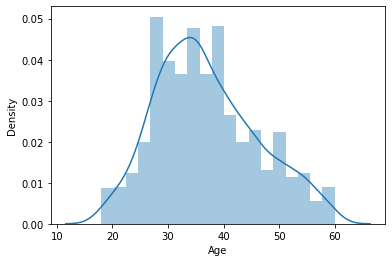

In [39]:
sns.distplot(df['Age'],kde=True)

Age column is looking normally distributed in ranges between approx 20 to 60.

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

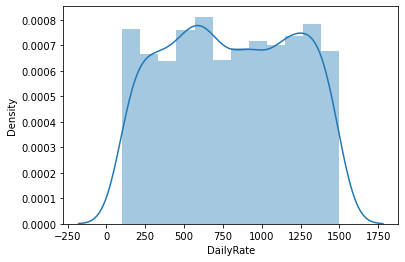

In [41]:
sns.distplot(df['DailyRate'],kde=True)

Daily Rate column is looking normally distributed ranges in between approx 200 to 1500.

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

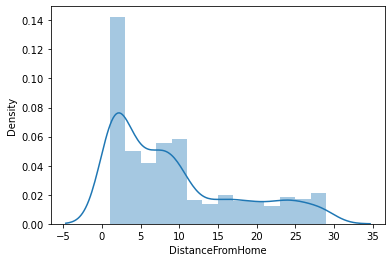

In [42]:
sns.distplot(df['DistanceFromHome'],kde=True)

DistanceFromHome column is not looking normally distributed ranges in between approx 1 to 29 with left skewed. 

<AxesSubplot:xlabel='Education', ylabel='Density'>

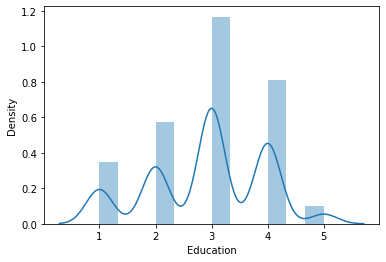

In [43]:
sns.distplot(df['Education'],kde=True)

Education column is varrying .

<AxesSubplot:xlabel='EmployeeNumber', ylabel='Density'>

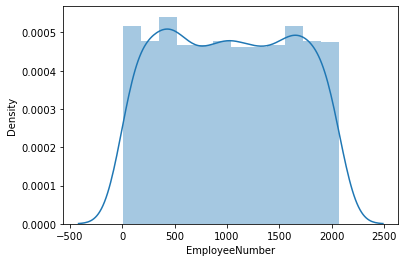

In [45]:
sns.distplot(df['EmployeeNumber'],kde=True)

EmployeeNumber column is normally distributed ,rangesin between 0 to approx 2000.

<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

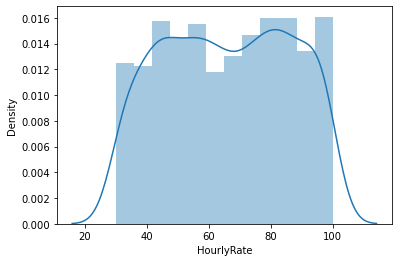

In [63]:
sns.distplot(df['HourlyRate'],kde=True)

HourlyRate column is normally distributed , ranges in between approx 30 to 100.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

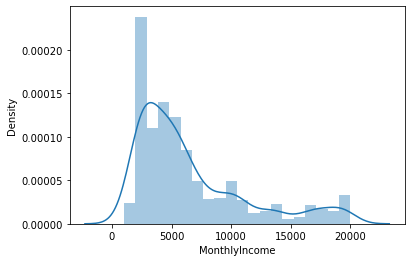

In [65]:
sns.distplot(df['MonthlyIncome'],kde=True)

MonthlyIncome column is left skewed .

<AxesSubplot:xlabel='MonthlyRate', ylabel='Density'>

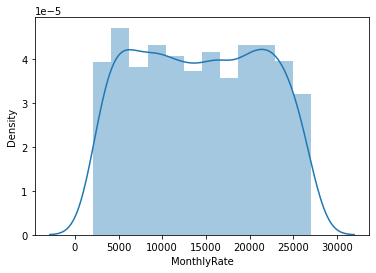

In [66]:
sns.distplot(df['MonthlyRate'],kde=True)

Monthly rate column is normally distributed.

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Density'>

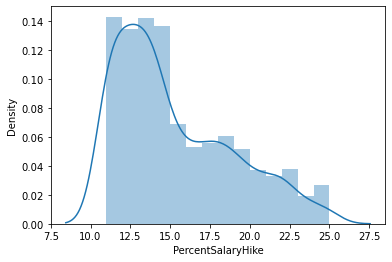

In [67]:
sns.distplot(df['PercentSalaryHike'],kde=True)

PercentSalaryHike column is left skewed.

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

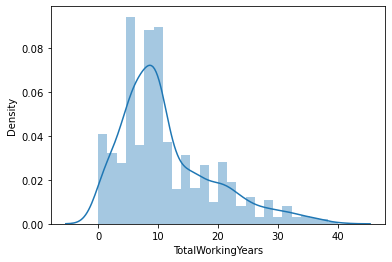

In [71]:
sns.distplot(df['TotalWorkingYears'],kde=True)

TotalWorkingYears is left skewed ranges in between 0 to 40.

# BIVARIATE ANALYSIS

In [72]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:title={'center':' comparison between Age and DailyRate'}, xlabel='Age', ylabel='DailyRate'>

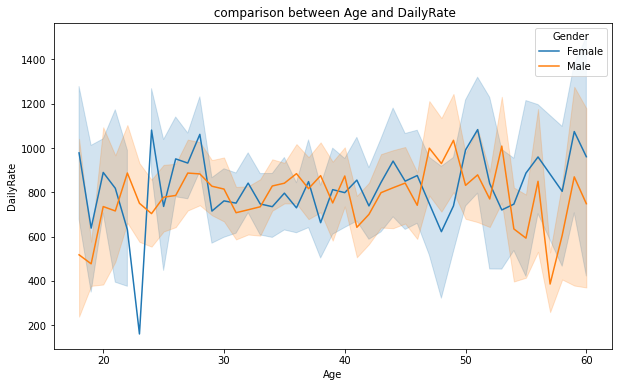

In [78]:
plt.figure(figsize=[10,6])
plt.title(' comparison between Age and DailyRate')
sns.lineplot(df['Age'], df['DailyRate'],hue=df['Gender'])

Looks like there is a decline in DailyRate in female age group of 20 to 25 and in male decline is in 55 to 60 age group.

<AxesSubplot:title={'center':' comparison between Age and HourlyRate'}, xlabel='Age', ylabel='HourlyRate'>

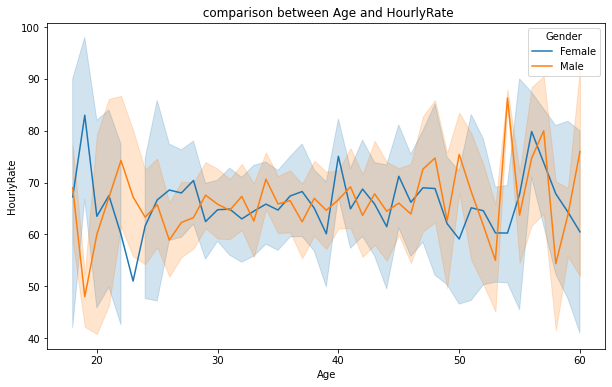

In [80]:
plt.figure(figsize=[10,6])
plt.title(' comparison between Age and HourlyRate')
sns.lineplot(df['Age'], df['HourlyRate'],hue=df['Gender'])

There is a hike in  HourlyRate in both male and female age group of 55 to 60.

<AxesSubplot:title={'center':' comparison between Age and MonthlyIncome'}, xlabel='Age', ylabel='MonthlyIncome'>

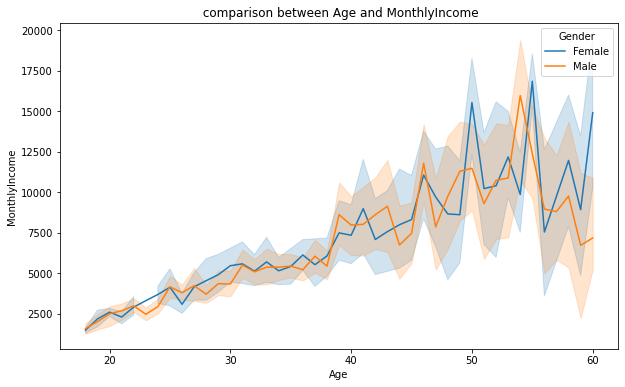

In [81]:
plt.figure(figsize=[10,6])
plt.title(' comparison between Age and MonthlyIncome')
sns.lineplot(df['Age'], df['MonthlyIncome'],hue=df['Gender'])

There is not much noticable difference between male and female MonthlyIncome ,both the lines for male and female is starting simoultaneously and ending approx simoultaneously. 

<AxesSubplot:title={'center':' comparison between Age and PercentSalaryHike'}, xlabel='Age', ylabel='PercentSalaryHike'>

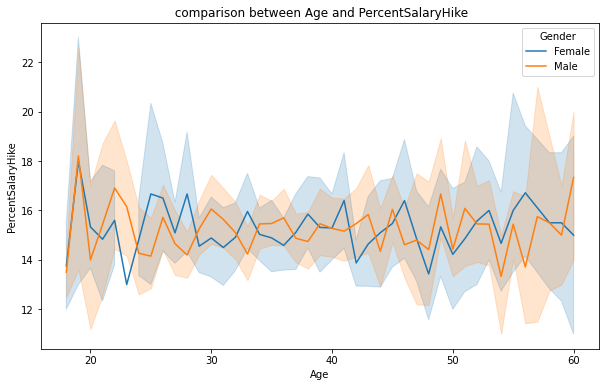

In [82]:
plt.figure(figsize=[10,6])
plt.title(' comparison between Age and PercentSalaryHike')
sns.lineplot(df['Age'], df['PercentSalaryHike'],hue=df['Gender'])

PercentSalaryHike is approximately same for both male and female in age group of ranges in between 20 to 60.

<AxesSubplot:title={'center':' comparison between Age and MonthlyRate'}, xlabel='Age', ylabel='MonthlyRate'>

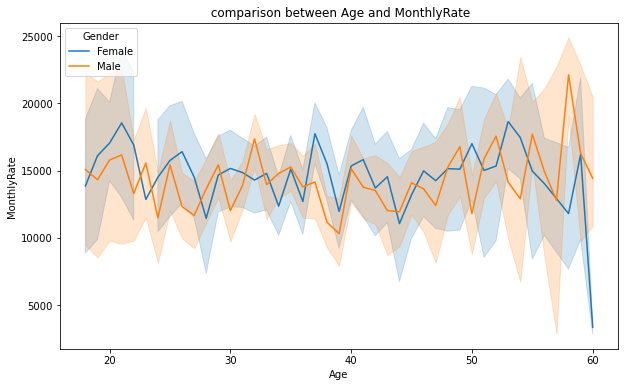

In [83]:
plt.figure(figsize=[10,6])
plt.title(' comparison between Age and MonthlyRate')
sns.lineplot(df['Age'], df['MonthlyRate'],hue=df['Gender'])

Male and female line is starting parallel in the lineplot , but there is little hike in Monthly Rate for male in 57 to 60 age group.

<AxesSubplot:title={'center':' comparison between Age and PerformanceRating'}, xlabel='Age', ylabel='PerformanceRating'>

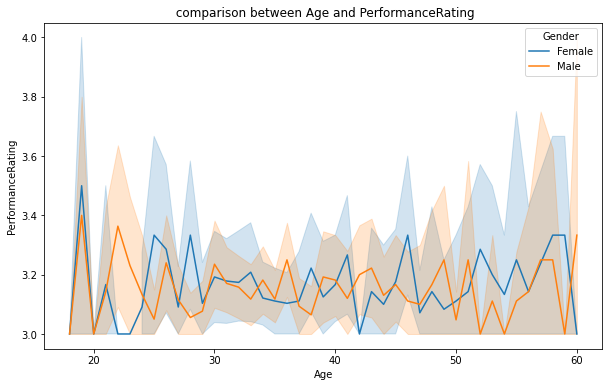

In [84]:
plt.figure(figsize=[10,6])
plt.title(' comparison between Age and PerformanceRating')
sns.lineplot(df['Age'], df['PerformanceRating'],hue=df['Gender'])

PerformanceRating is same for both male and female.

<AxesSubplot:title={'center':' comparison between Age and YearsInCurrentRole'}, xlabel='Age', ylabel='YearsInCurrentRole'>

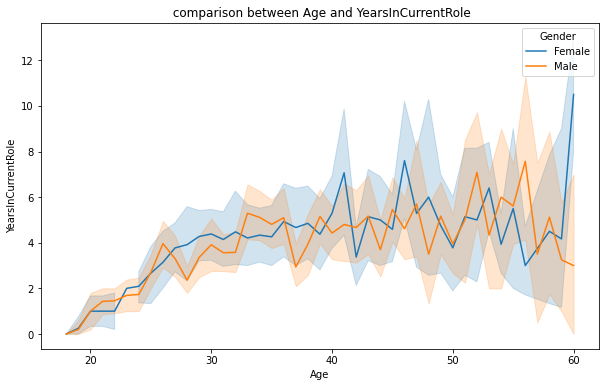

In [85]:
plt.figure(figsize=[10,6])
plt.title(' comparison between Age and YearsInCurrentRole')
sns.lineplot(df['Age'], df['YearsInCurrentRole'],hue=df['Gender'])

Both male and female employees are same for YearsInCurrentRole.

<AxesSubplot:title={'center':' comparison between Age and Attrition'}, xlabel='Age', ylabel='Attrition'>

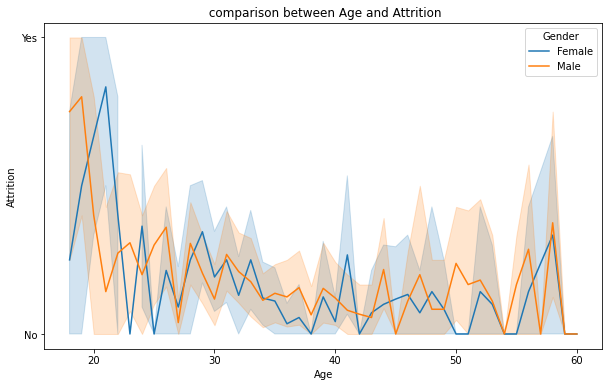

In [89]:
plt.figure(figsize=[10,6])
plt.title(' comparison between Age and Attrition')
sns.lineplot(df['Age'], df['Attrition'],hue=df['Gender'])

 Attrition is occuring approx same for both male and female.

# CHECKING OUTLIERS

Age                             AxesSubplot(0.125,0.71587;0.0945122x0.16413)
DailyRate                    AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
DistanceFromHome             AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
Education                    AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
EmployeeCount                AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
EmployeeNumber               AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
EnvironmentSatisfaction      AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
HourlyRate                     AxesSubplot(0.125,0.518913;0.0945122x0.16413)
JobInvolvement              AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
JobLevel                    AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
JobSatisfaction             AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
MonthlyIncome               AxesSubplot(0.578659,0.518913;0.0945122x0.16413)
MonthlyRate                 AxesSubplot(0.692073,0.518913;0.0945122x0.16413)

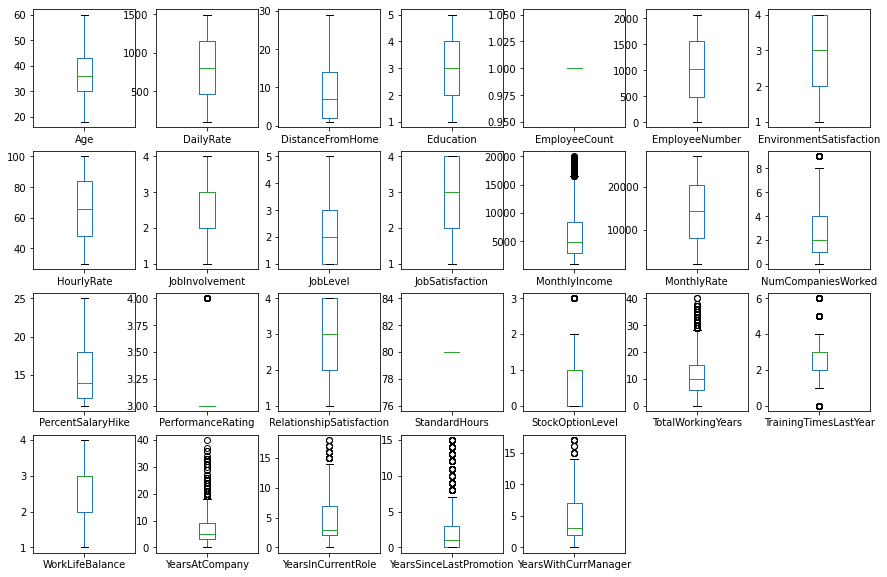

In [93]:
df.plot(kind='box', subplots=True ,layout=(4,7),figsize=(15,10))

Outliers are present in 'MonthlyIncome','NumComapaniesWorked', 'PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion', and 'YearsWithCurrManager' columns.

# CHECKING SKEWNESS

In [141]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

columns is in range between +.5 and -.5 are not skewed.

skewed columns are:
    
    DistanceFromHome
        
    JobLevel 
    
    MonthlyIncome
    
    NumCompaniesWorked
    
    PercentSalaryHike
    
    PerformanceRating
    
    TotalWorkingYears
    
    TrainingTimesLastYear
    
    WorkLifeBalance
        
    YearsAtCompany
    
    YearsInCurrentRole
    
    YearsSinceLastPromotion
    
    YearsWithCurrManager
    
    

# CONVERTING STRING COLUMNS TO NUMERIC COLUMNS

In [96]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [98]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])

In [99]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


string columns has been converted into numeric column

# DROPPING UNNECESSARY COLUMNS

In [106]:
df_=df.drop('EmployeeCount',inplace=True, axis=1)
df_=df.drop('StandardHours',inplace=True, axis=1)
df_=df.drop('Over18',inplace=True, axis=1)


Dropping because columns was with same value in every row.

# STATISTICAL SUMMARY

In [108]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

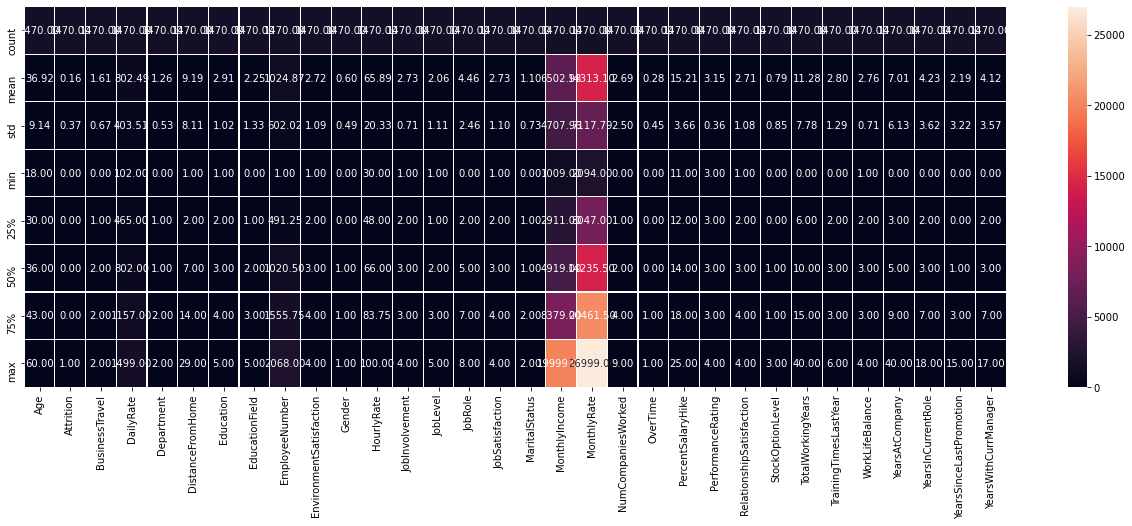

In [109]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths =0.1,fmt='0.2f')

Mean and Median is approximately same in the every column.

There is difference between 75th percentile and maximum in TotalWorkingYears, EmployeeNumber, YearsAtCompany,YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrManager columns.

datas are deviated.


# CORRELATION MATRIX

In [110]:
cor=df.corr()
cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


<AxesSubplot:>

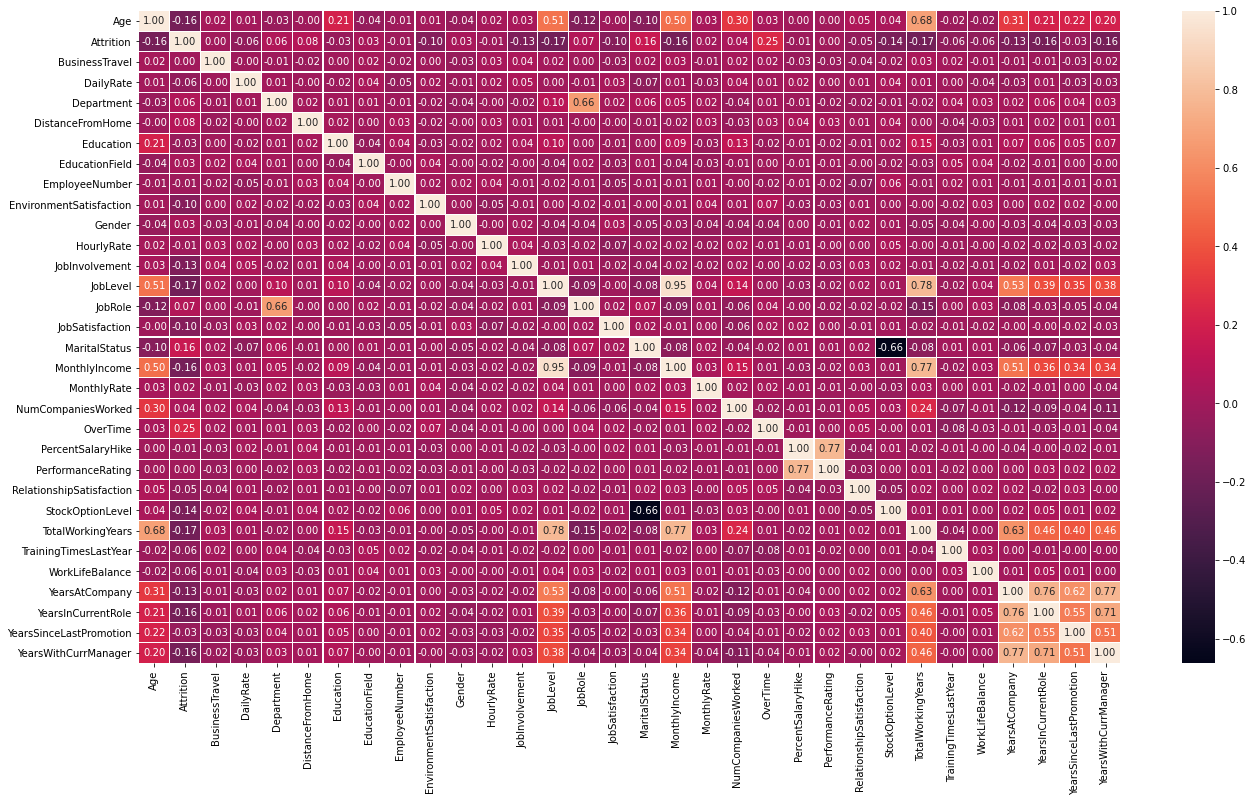

In [112]:
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(),annot=True,linewidths =0.1,fmt='0.2f')

Columns are not correlated with the target column 'Attrition'.

MonthlyIncome column is positively correlated with the JobLevel.

MaritalStatus column is negatively correlated with the StockOptionLevel.

JobLevel is positively correlated with TotalWorkingYears.

MonthlyIncome is positively correlated with TotalWorkingYears.



# REMOVING OUTLIERS

In [113]:
df.shape

(1470, 32)

In [114]:
from scipy.stats import zscore

In [148]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
         123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
         218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
         401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
         561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
         677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
         875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
         962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
        1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
        1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
       dtype=int64),
 array([31, 30, 28, 30, 29, 30, 25, 25, 28, 30, 29, 30, 31, 25, 28, 30, 31,
        30, 25, 31, 28, 29, 30, 29, 31, 28, 30, 25, 28, 29, 30, 30, 31, 25,
        28, 28, 30, 30, 25, 29, 28, 28, 30, 28, 31, 30, 28, 25, 28, 30, 31,
        25

In [149]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [117]:
df.shape

(1470, 32)

In [118]:
df_new_z.shape

(1387, 32)

83 rows has been removed as a outlier.

In [140]:
df_new_z.isnull().sum()

Age                            0
Attrition                      0
BusinessTravel                 0
DailyRate                      0
Department                     0
DistanceFromHome             396
Education                      0
EducationField                 0
EmployeeNumber                 0
EnvironmentSatisfaction        0
Gender                         0
HourlyRate                     0
JobInvolvement                 0
JobLevel                    1071
JobRole                        0
JobSatisfaction                0
MaritalStatus                  0
MonthlyIncome                  0
MonthlyRate                    0
NumCompaniesWorked           820
OverTime                     992
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
StockOptionLevel             598
TotalWorkingYears             11
TrainingTimesLastYear          0
WorkLifeBalance                0
YearsAtCompany                44
YearsInCurrentRole             0
YearsSince

During outlier removal most of the data is loosing ,and columns becoming NaN, so it will not take it out in during x and y splliting thats is why taken a variable df_new_z.

# REMOVING SKEWNESS

In [138]:
df_new_z.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -2.520356
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome           -1.245480
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.679603
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.127943
MonthlyRate                 0.030596
NumCompaniesWorked         -0.396055
OverTime                    0.000000
PercentSalaryHike           0.420475
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.953366
TotalWorkingYears          -2.347247
TrainingTimesLastYear       0.577614
W

Most of the skewness has been removed during outlier removal , tried to remove more skewness but data is loosing and beciming nan

In [139]:
df_new_z.isnull().sum()

Age                            0
Attrition                      0
BusinessTravel                 0
DailyRate                      0
Department                     0
DistanceFromHome             396
Education                      0
EducationField                 0
EmployeeNumber                 0
EnvironmentSatisfaction        0
Gender                         0
HourlyRate                     0
JobInvolvement                 0
JobLevel                    1071
JobRole                        0
JobSatisfaction                0
MaritalStatus                  0
MonthlyIncome                  0
MonthlyRate                    0
NumCompaniesWorked           820
OverTime                     992
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
StockOptionLevel             598
TotalWorkingYears             11
TrainingTimesLastYear          0
WorkLifeBalance                0
YearsAtCompany                44
YearsInCurrentRole             0
YearsSince

Data is also loosing in Skewness removal.

# SPLITTING THE INDEPENDENT AND TARGET VARIABLE

In [151]:
x=df.drop('Attrition',axis=1)
y=df['Attrition']

In [152]:
x.shape

(1470, 31)

In [153]:
y.shape

(1470,)

# HANDLING CLASS IMBALANCE PROBLEM BY OVERSAMPLING THE MINORITY CLASS

In [154]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over=SM.fit_resample(x,y)

In [155]:
y_over.value_counts()

0    1233
1    1233
Name: Attrition, dtype: int64

Now the imbalancing problem has been solved

# TRAIN TEST SPLIT

In [156]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.22, random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1146, 31)
(324, 31)
(1146,)
(324,)


# MODEL BUILDING

In [157]:
# IMPORTING LIBRARIES
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [173]:
lr=LogisticRegression()
ad=AdaBoostClassifier()
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
svc=SVC()

In [162]:
#LogisticRegression
lr.fit(x_train, y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
    
    

0.808641975308642
[[259   1]
 [ 61   3]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       260
           1       0.75      0.05      0.09        64

    accuracy                           0.81       324
   macro avg       0.78      0.52      0.49       324
weighted avg       0.80      0.81      0.73       324



In [163]:
# Logistic Regression Cross Validation

scr=cross_val_score(lr,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.8414965986394558


Accuracy score is 80% and cv score is 84% of Logistic Reression.

In [164]:
# AdaBoostClassifier
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))


0.8333333333333334
[[247  13]
 [ 41  23]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       260
           1       0.64      0.36      0.46        64

    accuracy                           0.83       324
   macro avg       0.75      0.65      0.68       324
weighted avg       0.81      0.83      0.81       324



In [165]:
#For AdaBoostClassifier cross validation
scr=cross_val_score(ad,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.8571428571428571


Accuracy score is 83% and cv score is 85% of adaboost classifier.

In [166]:
# RandomForestClassifier
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8179012345679012
[[258   2]
 [ 57   7]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       260
           1       0.78      0.11      0.19        64

    accuracy                           0.82       324
   macro avg       0.80      0.55      0.54       324
weighted avg       0.81      0.82      0.76       324



In [167]:
# For randomforest Classifier cross validation
scr=cross_val_score(rf,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.858503401360544


Accuracy score is 81% and cv score is 85% of random forest classifier.

In [168]:
#DecisionTreeClassifier
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7839506172839507
[[233  27]
 [ 43  21]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       260
           1       0.44      0.33      0.38        64

    accuracy                           0.78       324
   macro avg       0.64      0.61      0.62       324
weighted avg       0.76      0.78      0.77       324



In [169]:
# For DecisionTreeClassifier cross validation
scr=cross_val_score(dt,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7768707482993198


Accuracy score is 78% and cross validation score is 77% for Decision Tree classifier.

In [170]:
# GaussianNB
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7808641975308642
[[217  43]
 [ 28  36]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       260
           1       0.46      0.56      0.50        64

    accuracy                           0.78       324
   macro avg       0.67      0.70      0.68       324
weighted avg       0.80      0.78      0.79       324



In [171]:
# For GaussianNB cross validation
scr=cross_val_score(gnb,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7972789115646259


Accuracy score is 78% and cv score is 79% forr gaussianNB.

In [174]:
# SVC
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8024691358024691
[[260   0]
 [ 64   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       260
           1       0.00      0.00      0.00        64

    accuracy                           0.80       324
   macro avg       0.40      0.50      0.45       324
weighted avg       0.64      0.80      0.71       324



In [175]:
# SVC cross validation

scr=cross_val_score(sv,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.8387755102040817


Accuracy Score is 80% and cv score is 83%.

# AUC ROC CURVE

In [176]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [196]:
ad.fit(x_train,y_train)
y_pred_prob=lr.predict_proba(x_test)[:,1]


In [197]:
y_pred_prob

array([0.34161589, 0.17803262, 0.09764305, 0.14673636, 0.4381658 ,
       0.29209856, 0.04316239, 0.102231  , 0.0588912 , 0.09231134,
       0.07044547, 0.34239266, 0.16002346, 0.12304352, 0.16489356,
       0.03905237, 0.02696923, 0.0467475 , 0.19684114, 0.00761625,
       0.03310792, 0.02000192, 0.35774907, 0.13393745, 0.05446595,
       0.01620486, 0.09793435, 0.0505692 , 0.02727952, 0.24607604,
       0.25601385, 0.12071608, 0.11505778, 0.11155808, 0.11991045,
       0.02403643, 0.23137977, 0.24053751, 0.50399452, 0.16599097,
       0.14434763, 0.07090449, 0.04684027, 0.11728254, 0.14694419,
       0.11990128, 0.1103372 , 0.26290031, 0.0194799 , 0.093689  ,
       0.15065415, 0.20960342, 0.30955606, 0.06567818, 0.05381679,
       0.11950955, 0.04190207, 0.27358027, 0.07465932, 0.12830822,
       0.27625018, 0.16612848, 0.05378643, 0.07491027, 0.22625971,
       0.2963974 , 0.08013733, 0.12892894, 0.01680935, 0.29021067,
       0.04508428, 0.09834282, 0.09610588, 0.1832409 , 0.17101

In [198]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr
tpr

array([0.      , 0.015625, 0.03125 , 0.03125 , 0.046875, 0.046875,
       0.0625  , 0.0625  , 0.078125, 0.078125, 0.09375 , 0.09375 ,
       0.109375, 0.109375, 0.125   , 0.125   , 0.140625, 0.140625,
       0.1875  , 0.1875  , 0.203125, 0.203125, 0.21875 , 0.21875 ,
       0.234375, 0.234375, 0.25    , 0.25    , 0.296875, 0.296875,
       0.3125  , 0.3125  , 0.34375 , 0.34375 , 0.359375, 0.359375,
       0.390625, 0.390625, 0.40625 , 0.40625 , 0.421875, 0.421875,
       0.453125, 0.453125, 0.46875 , 0.46875 , 0.5     , 0.5     ,
       0.53125 , 0.53125 , 0.5625  , 0.5625  , 0.578125, 0.578125,
       0.59375 , 0.59375 , 0.609375, 0.609375, 0.625   , 0.625   ,
       0.640625, 0.640625, 0.65625 , 0.65625 , 0.671875, 0.671875,
       0.6875  , 0.6875  , 0.703125, 0.703125, 0.71875 , 0.71875 ,
       0.734375, 0.734375, 0.75    , 0.75    , 0.765625, 0.765625,
       0.796875, 0.796875, 0.8125  , 0.8125  , 0.859375, 0.859375,
       0.875   , 0.875   , 0.890625, 0.890625, 0.90625 , 0.906

In [199]:
thresholds

array([1.64870377, 0.64870377, 0.514408  , 0.50729479, 0.50399452,
       0.48693353, 0.47829679, 0.35774907, 0.35676297, 0.34627803,
       0.34273905, 0.34239266, 0.34161589, 0.30955606, 0.30837318,
       0.29546955, 0.29541852, 0.29021067, 0.28689111, 0.28214178,
       0.28123376, 0.27358027, 0.27272094, 0.26915014, 0.26606713,
       0.26126338, 0.25921668, 0.25601385, 0.25126394, 0.24607604,
       0.24402578, 0.22564476, 0.22291178, 0.20120501, 0.20043214,
       0.19789754, 0.19559726, 0.18253151, 0.18115357, 0.17830099,
       0.17803262, 0.17585587, 0.17529104, 0.17275657, 0.17178075,
       0.17166633, 0.16983632, 0.16599097, 0.16544041, 0.1625325 ,
       0.16224663, 0.15887707, 0.15820187, 0.15462305, 0.15209807,
       0.15065415, 0.14880921, 0.12844444, 0.12830822, 0.12818668,
       0.12762827, 0.11660613, 0.11640715, 0.10665131, 0.10591216,
       0.10374483, 0.10244115, 0.10120779, 0.10066084, 0.09645061,
       0.09610588, 0.09462854, 0.093689  , 0.09363211, 0.09285

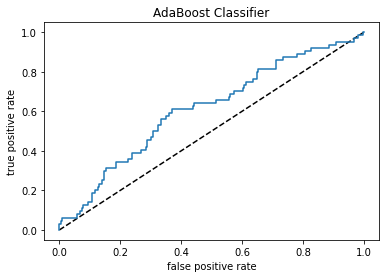

In [203]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoost Classifeir')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('AdaBoost Classifier')
plt.show()

In [202]:
auc_score=roc_auc_score(y_test,ad.predict(x_test))
print(auc_score)

0.6546875


Auc_score of Adaboost Classifier is 65%.

# HYPER PARAMETER TUNING

In [208]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

ad=AdaBoostClassifier(n_estimators=100,random_state=0)

grid_param={
           'algorithm':['SAMME','SAMME.R']}

gd_sr=GridSearchCV(estimator=ad,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x,y)

best_parameters =gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)


{'algorithm': 'SAMME'}
0.865986394557823


# FINAL MODEL

In [212]:
ad=AdaBoostClassifier
final_mod=ad(algorithm='SAMME')
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

84.87654320987654


# SAVING THE MODEL

In [213]:
import pickle
filename='ibm_hr_attrition.pkl'
pickle.dump(ad, open(filename, 'wb'))

 # CONCLUSION

Above predictions from the model , we can say that our model is performing extremly well, we are getting 84.87% accuracy .

With the help of MODEL , I learnt how to done EDA.

I also learnt ,making use of packages like matplotlib and seaborn to develop better insights of the data.

I have also learnt how to remove outliers and skewness to predict better accuracy.

I have also seen the impacts on the columns on target columns..

I came to know through the analysis ,which model will predict better accuracy.

This project helped me to gain deep knowledge , and also get to know where to use models.